# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [65]:
#OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

#print(query_url)

In [4]:
city_other = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_other.append(city)
        else:
            count_one += 1
            city_other.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
    time.sleep(0.1)
print("------------------------------Complete Data Retrieved------------------------------")

Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | nalut
Processing Record 3 of Set 1 | jamestown
City not found. Skipping...
Processing Record 4 of Set 1 | likhoslavl
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | vieques
Processing Record 7 of Set 1 | wanxian
Processing Record 8 of Set 1 | tura
Processing Record 9 of Set 1 | jiuquan
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | sao filipe
City not found. Skipping...
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | tungor
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | melfi
Processing Record 19 of Set 1 | hailar
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set

Processing Record 39 of Set 4 | nemuro
Processing Record 40 of Set 4 | beyla
Processing Record 41 of Set 4 | rochegda
Processing Record 42 of Set 4 | hofn
Processing Record 43 of Set 4 | puerto escondido
Processing Record 44 of Set 4 | mirnyy
City not found. Skipping...
City not found. Skipping...
Processing Record 45 of Set 4 | merauke
Processing Record 46 of Set 4 | severo-kurilsk
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | hobyo
Processing Record 49 of Set 4 | upernavik
Processing Record 1 of Set 5 | beaverlodge
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | bolitoc
Processing Record 4 of Set 5 | aksu
Processing Record 5 of Set 5 | tandil
Processing Record 6 of Set 5 | ampanihy
Processing Record 7 of Set 5 | sabalgarh
Processing Record 8 of Set 5 | pangnirtung
Processing Record 9 of Set 5 | waddan
Processing Record 10 of Set 5 | sorong
Processing Record 11 of Set 5 | pochutla
Processing Record 12 of Set 5 | banda aceh
Processing Re

Processing Record 29 of Set 8 | guerrero negro
Processing Record 30 of Set 8 | tibati
Processing Record 31 of Set 8 | itupiranga
City not found. Skipping...
Processing Record 32 of Set 8 | sungurlu
Processing Record 33 of Set 8 | elban
Processing Record 34 of Set 8 | karratha
Processing Record 35 of Set 8 | bali
Processing Record 36 of Set 8 | luderitz
Processing Record 37 of Set 8 | kawalu
Processing Record 38 of Set 8 | larimna
Processing Record 39 of Set 8 | iracoubo
Processing Record 40 of Set 8 | bria
Processing Record 41 of Set 8 | codrington
Processing Record 42 of Set 8 | vrises
Processing Record 43 of Set 8 | troitsko-pechorsk
Processing Record 44 of Set 8 | westport
Processing Record 45 of Set 8 | taitung
Processing Record 46 of Set 8 | brae
Processing Record 47 of Set 8 | honiara
City not found. Skipping...
Processing Record 48 of Set 8 | kununurra
Processing Record 49 of Set 8 | aginskoye
Processing Record 1 of Set 9 | grindavik
Processing Record 2 of Set 9 | togul
City not

Processing Record 19 of Set 12 | kuytun
Processing Record 20 of Set 12 | asfi
Processing Record 21 of Set 12 | wadi maliz
Processing Record 22 of Set 12 | ozernovskiy
Processing Record 23 of Set 12 | paramonga
City not found. Skipping...
Processing Record 24 of Set 12 | itoman
Processing Record 25 of Set 12 | padang
Processing Record 26 of Set 12 | basco
Processing Record 27 of Set 12 | tabou
City not found. Skipping...
Processing Record 28 of Set 12 | xique-xique
Processing Record 29 of Set 12 | abu samrah
------------------------------Complete Data Retrieved------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame(
    {
    "City": city_other,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
    }
)
weather_df.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

In [7]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,qaanaaq,0,GL,1584020615,44,77.48,-69.36,-17.05,5.66
1,nalut,0,LY,1584020884,26,30.33,10.85,66.15,13.04
2,jamestown,90,US,1584020511,93,42.10,-79.24,41.00,3.36
3,likhoslavl,100,RU,1584020885,73,57.13,35.46,40.50,9.04
4,mataura,2,NZ,1584020610,89,-46.19,168.86,48.99,3.00


In [8]:
# Exporting to CSV

weather_df.to_csv("weather_df.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

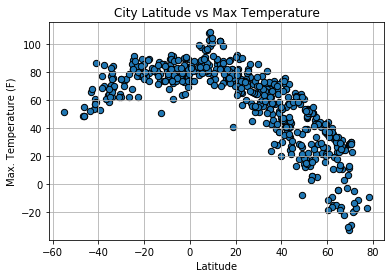

In [16]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker='o',s=40, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("Latitude VS Max Temperature.png")

#### Latitude vs. Humidity Plot

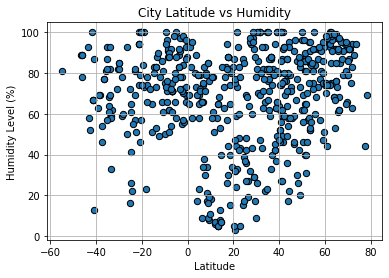

In [21]:
#create a Scatter Plot for Lattitude vs Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker='o', s=40, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('Latitude VS Humidity Level.png')

#### Latitude vs. Cloudiness Plot

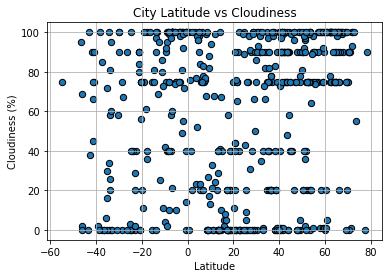

In [22]:
#create a Scatter Plot for Lattitude vs Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker='o', s=40, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('Latitude VS Cloudiness.png')

#### Latitude vs. Wind Speed Plot

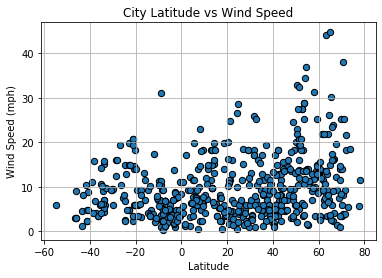

In [23]:
#create a Scatter Plot for Lattitude vs Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker='o', s=40, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('Latitude VS Wind Speed.png')

## Linear Regression

In [25]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"]>0.01]
southern_hemisphere = weather_df.loc[weather_df["Lat"]<-0.01]

northern_hemisphere.head()
southern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,mataura,2,NZ,1584020610,89,-46.19,168.86,48.99,3.00
11,arraial do cabo,0,BR,1584020611,57,-22.84,-46.65,80.01,4.70
12,ushuaia,75,AR,1584020609,81,-54.80,-68.30,51.80,5.82
14,vaini,90,TO,1584020612,100,-21.20,-175.20,77.00,2.24
21,hermanus,0,ZA,1584020608,68,-34.42,19.23,71.01,8.99


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8594903148453343


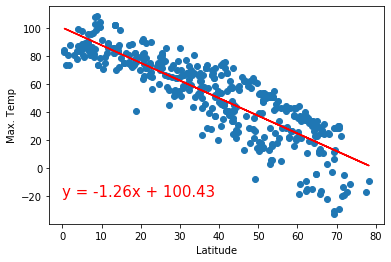

In [42]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()
print(f"The r-squared is: {(rvalue)}")

plt.savefig("Latitude VS North Hem Temperature.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5829885555301202


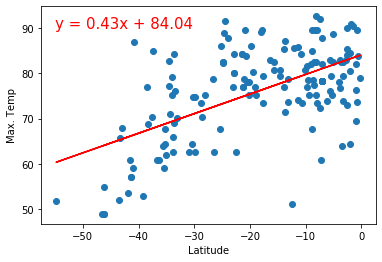

In [47]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
#plt.show()
print(f"The r-squared is: {(rvalue)}")

plt.savefig("Latitude VS South Hem Temperature.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3949696181144641


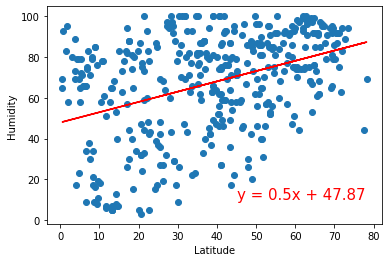

In [51]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

plt.ylabel("Humidity")
plt.xlabel("Latitude")
#plt.show()
print(f"The r-squared is: {(rvalue)}")

plt.savefig("Latitude VS North Hem Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17037875722544482


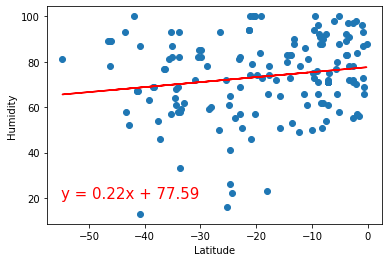

In [54]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

plt.ylabel("Humidity")
plt.xlabel("Latitude")
#plt.show()
print(f"The r-squared is: {(rvalue)}")

plt.savefig("Latitude VS South Hem Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.30950262903823705


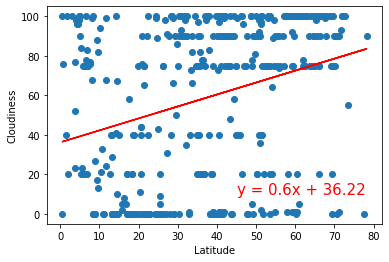

In [56]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
#plt.show()
print(f"The r-squared is: {(rvalue)}")

plt.savefig("Latitude VS North Hem Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3517494826830825


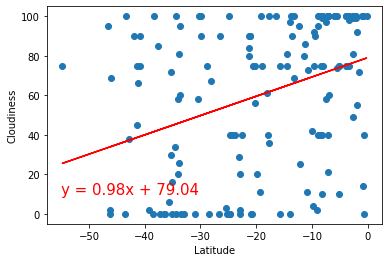

In [59]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
#plt.show()
print(f"The r-squared is: {(rvalue)}")

plt.savefig("Latitude VS South Hem Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.24466589178529838


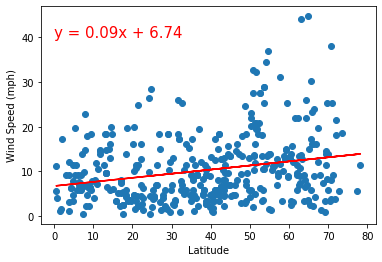

In [61]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#plt.show()
print(f"The r-squared is: {(rvalue)}")

plt.savefig("Latitude VS North Hem Cloudiness.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.14355256201134425


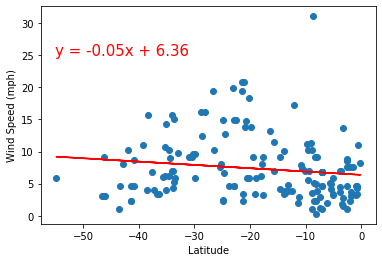

In [64]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#plt.show()
print(f"The r-squared is: {(rvalue)}")

plt.savefig("Latitude VS South Hem Cloudiness.png")